In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'D:\train.csv')

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [6]:
df.shape

(1168, 81)

In [7]:
corr=df.describe()
corr.shape
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

MSZoning
['RL' 'RM' 'FV' 'RH' 'C (all)']
Street
['Pave' 'Grvl']
Alley
[nan 'Grvl' 'Pave']
LotShape
['IR1' 'Reg' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'HLS' 'Low']
Utilities
['AllPub']
LotConfig
['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
LandSlope
['Gtl' 'Mod' 'Sev']
Neighborhood
['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDale' 'StoneBr' 'BrkSide'
 'NridgHt' 'OldTown' 'Somerst' 'Timber' 'SWISU' 'SawyerW' 'ClearCr'
 'Veenker' 'Blmngtn' 'MeadowV' 'Blueste']
Condition1
['Norm' 'Feedr' 'RRAn' 'PosA' 'RRAe' 'Artery' 'PosN' 'RRNe' 'RRNn']
Condition2
['Norm' 'RRAe' 'Feedr' 'PosN' 'Artery' 'RRNn' 'PosA' 'RRAn']
BldgType
['TwnhsE' '1Fam' 'Duplex' 'Twnhs' '2fmCon']
HouseStyle
['1Story' '2Story' '1.5Fin' 'SFoyer' '1.5Unf' 'SLvl' '2.5Fin' '2.5Unf']
RoofStyle
['Gable' 'Flat' 'Hip' 'Shed' 'Gambrel' 'Mansard']
RoofMatl
['CompShg' 'Tar&Grv' 'WdShngl' 'WdShake' 'Roll' 'ClyTile' 'Metal'
 'Membran']
Exterior1st
['Plywood' 'Wd Sdng' 'MetalSd

In [9]:
# finding the missing values
features_na=[features for features  in df.columns if df[features].isnull().sum()>0]
for feature in features_na:
    print(feature,np.round(df[feature].isnull().mean(),4), '% missing values')
else:
    print('no missing values')

LotFrontage 0.1832 % missing values
Alley 0.9341 % missing values
MasVnrType 0.006 % missing values
MasVnrArea 0.006 % missing values
BsmtQual 0.0257 % missing values
BsmtCond 0.0257 % missing values
BsmtExposure 0.0265 % missing values
BsmtFinType1 0.0257 % missing values
BsmtFinType2 0.0265 % missing values
FireplaceQu 0.4717 % missing values
GarageType 0.0548 % missing values
GarageYrBlt 0.0548 % missing values
GarageFinish 0.0548 % missing values
GarageQual 0.0548 % missing values
GarageCond 0.0548 % missing values
PoolQC 0.994 % missing values
Fence 0.7971 % missing values
MiscFeature 0.9623 % missing values
no missing values


In [10]:
# find features with one value
for column in df.columns:
    print(column,df[column].nunique())
    

Id 1168
MSSubClass 15
MSZoning 5
LotFrontage 106
LotArea 892
Street 2
Alley 2
LotShape 4
LandContour 4
Utilities 1
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
YearBuilt 110
YearRemodAdd 61
RoofStyle 6
RoofMatl 8
Exterior1st 14
Exterior2nd 15
MasVnrType 4
MasVnrArea 283
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinSF1 551
BsmtFinType2 6
BsmtFinSF2 122
BsmtUnfSF 681
TotalBsmtSF 636
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
1stFlrSF 669
2ndFlrSF 351
LowQualFinSF 21
GrLivArea 746
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 4
FireplaceQu 5
GarageType 6
GarageYrBlt 97
GarageFinish 3
GarageCars 5
GarageArea 392
GarageQual 5
GarageCond 5
PavedDrive 3
WoodDeckSF 244
OpenPorchSF 176
EnclosedPorch 106
3SsnPorch 18
ScreenPorch 65
PoolArea 8
PoolQC 3
Fence 4
MiscFeature 4
MiscVa

In [11]:
categorical_features =[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['SalePrice']))]
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

ValueError: num must be 1 <= num <= 36, not 37

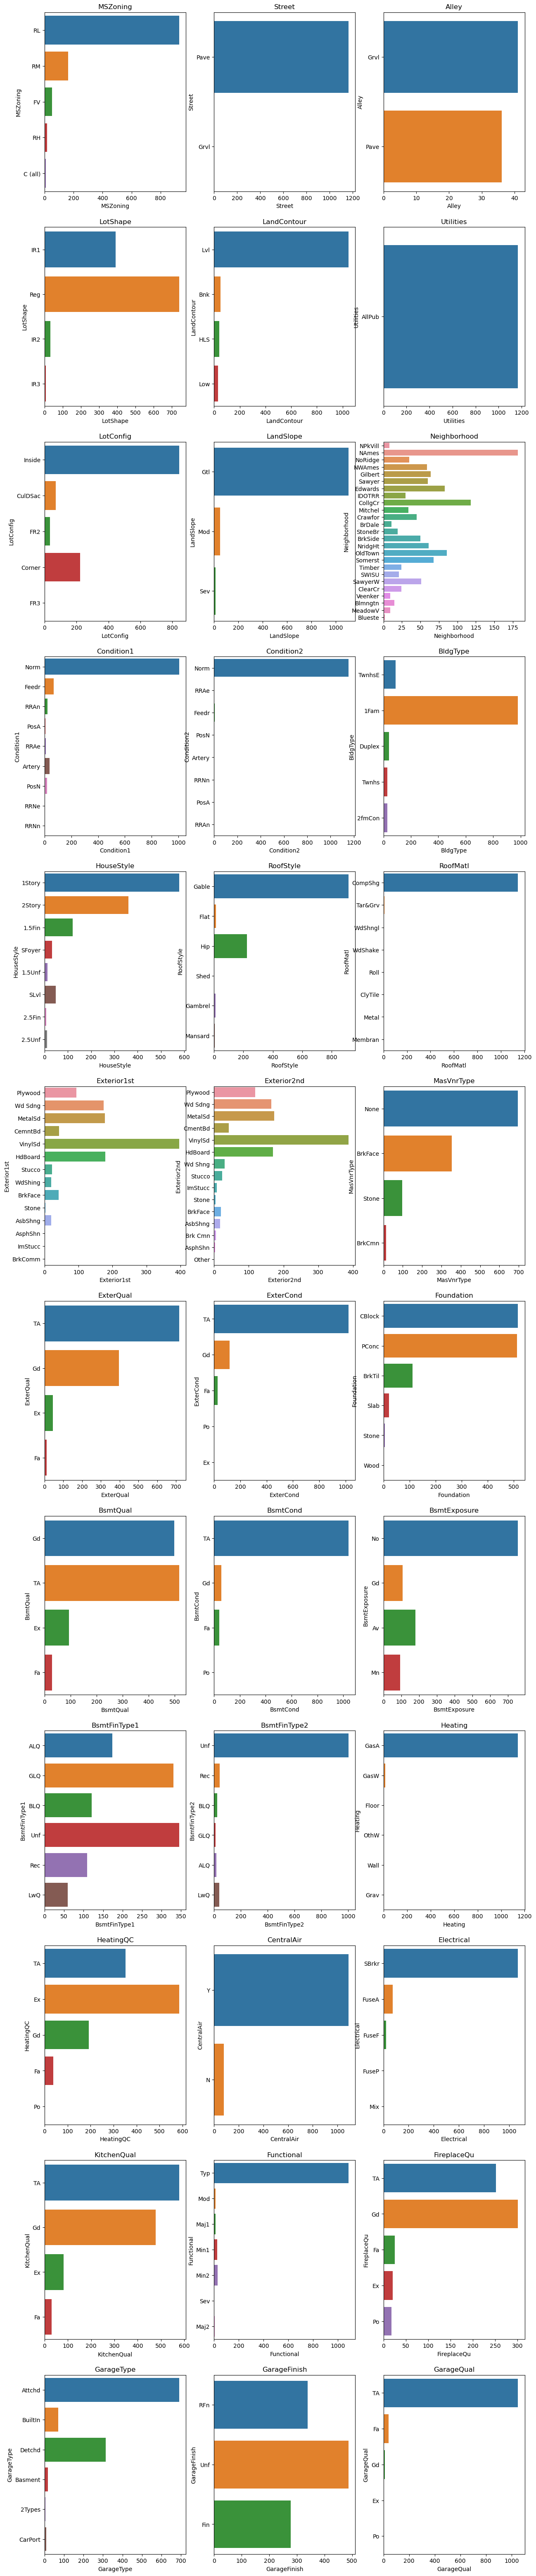

In [12]:
# check count based on categorical features 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,80),facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()    

In [14]:
# check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(df.groupby(['SalePrice',categorical_feature]).size())

SalePrice  MSZoning
34900      C (all)     1
35311      C (all)     1
37900      RM          1
39300      RL          1
40000      C (all)     1
                      ..
582933     RL          1
611657     RL          1
625000     RL          1
745000     RL          1
755000     RL          1
Length: 697, dtype: int64
SalePrice  Street
34900      Pave      1
35311      Pave      1
37900      Pave      1
39300      Pave      1
40000      Pave      1
                    ..
582933     Pave      1
611657     Pave      1
625000     Pave      1
745000     Pave      1
755000     Pave      1
Length: 583, dtype: int64
SalePrice  Alley
40000      Pave     1
52500      Grvl     1
58500      Grvl     1
87000      Grvl     1
89500      Grvl     1
                   ..
208900     Pave     1
214500     Pave     1
239000     Pave     1
256000     Grvl     1
265979     Pave     1
Length: 70, dtype: int64
SalePrice  LotShape
34900      Reg         1
35311      Reg         1
37900      Reg         1
393

In [15]:
# exploring the numerical values
num_features=[feature for feature in df.columns if ((df[feature].dtypes!='O')& (feature not in ['SalePrice']))]
num_features
df[num_features].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,127,120,NaN,4928,6,5,1976,1976,0.0,120,...,440,0,205,0,0,0,0,0,2,2007
1,889,20,95.0,15865,8,6,1970,1970,0.0,351,...,621,81,207,0,0,224,0,0,10,2007
2,793,60,92.0,9920,7,5,1996,1997,0.0,862,...,455,180,130,0,0,0,0,0,6,2007
3,110,20,105.0,11751,6,6,1977,1977,480.0,705,...,546,0,122,0,0,0,0,0,1,2010
4,422,20,NaN,16635,6,7,1977,2000,126.0,1246,...,529,240,0,0,0,0,0,0,6,2009


find discrete numnerical features 

In [16]:
dis_feature=[feature for feature in num_features if len(df[feature].unique())<25]
print('discrete variables count:{}'.format(len(dis_feature)))

discrete variables count:18


In [17]:
# FINDING THE CONTINOUS NUMERICAS 
con_features=[feature for feature in num_features if feature not in dis_feature+['subscribed']]
print('continous features count:{}'.format(len(con_features)))

continous features count:19


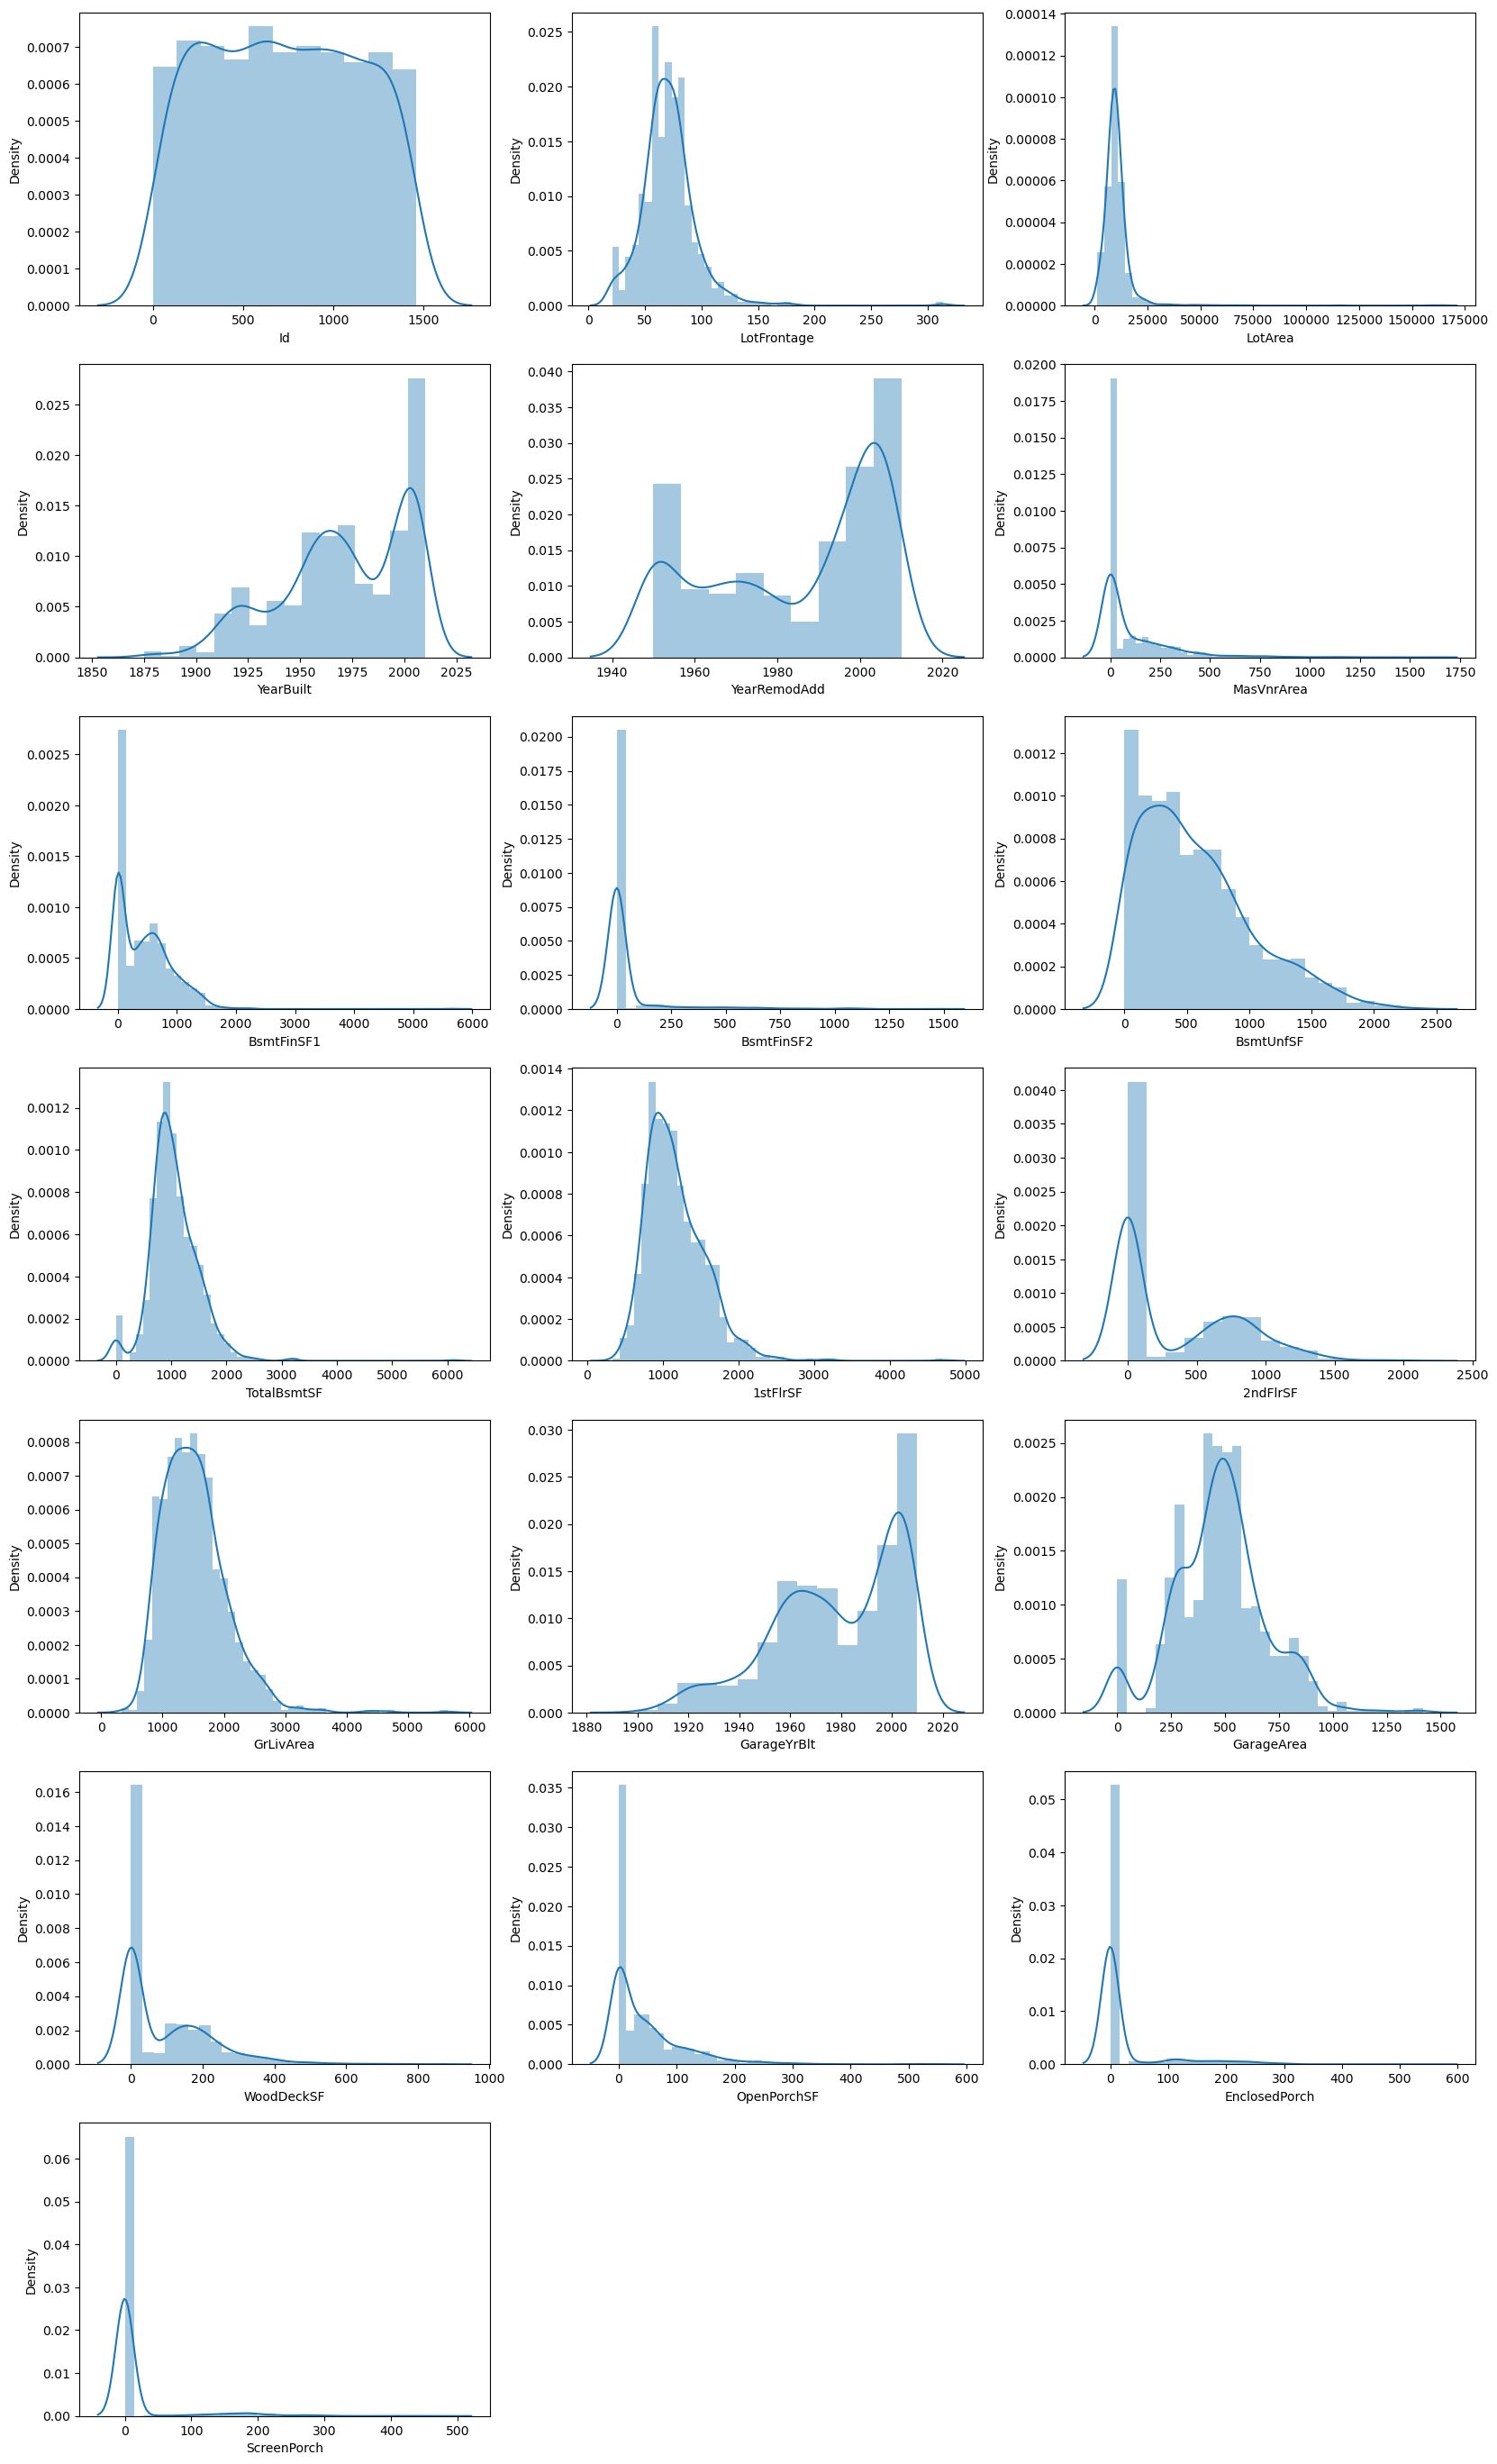

In [19]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for con_feature in con_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.distplot(df[con_feature])
    plt.xlabel(con_feature)
    plotnumber+=1
plt.show()    

relationship between continous numerical features and labels

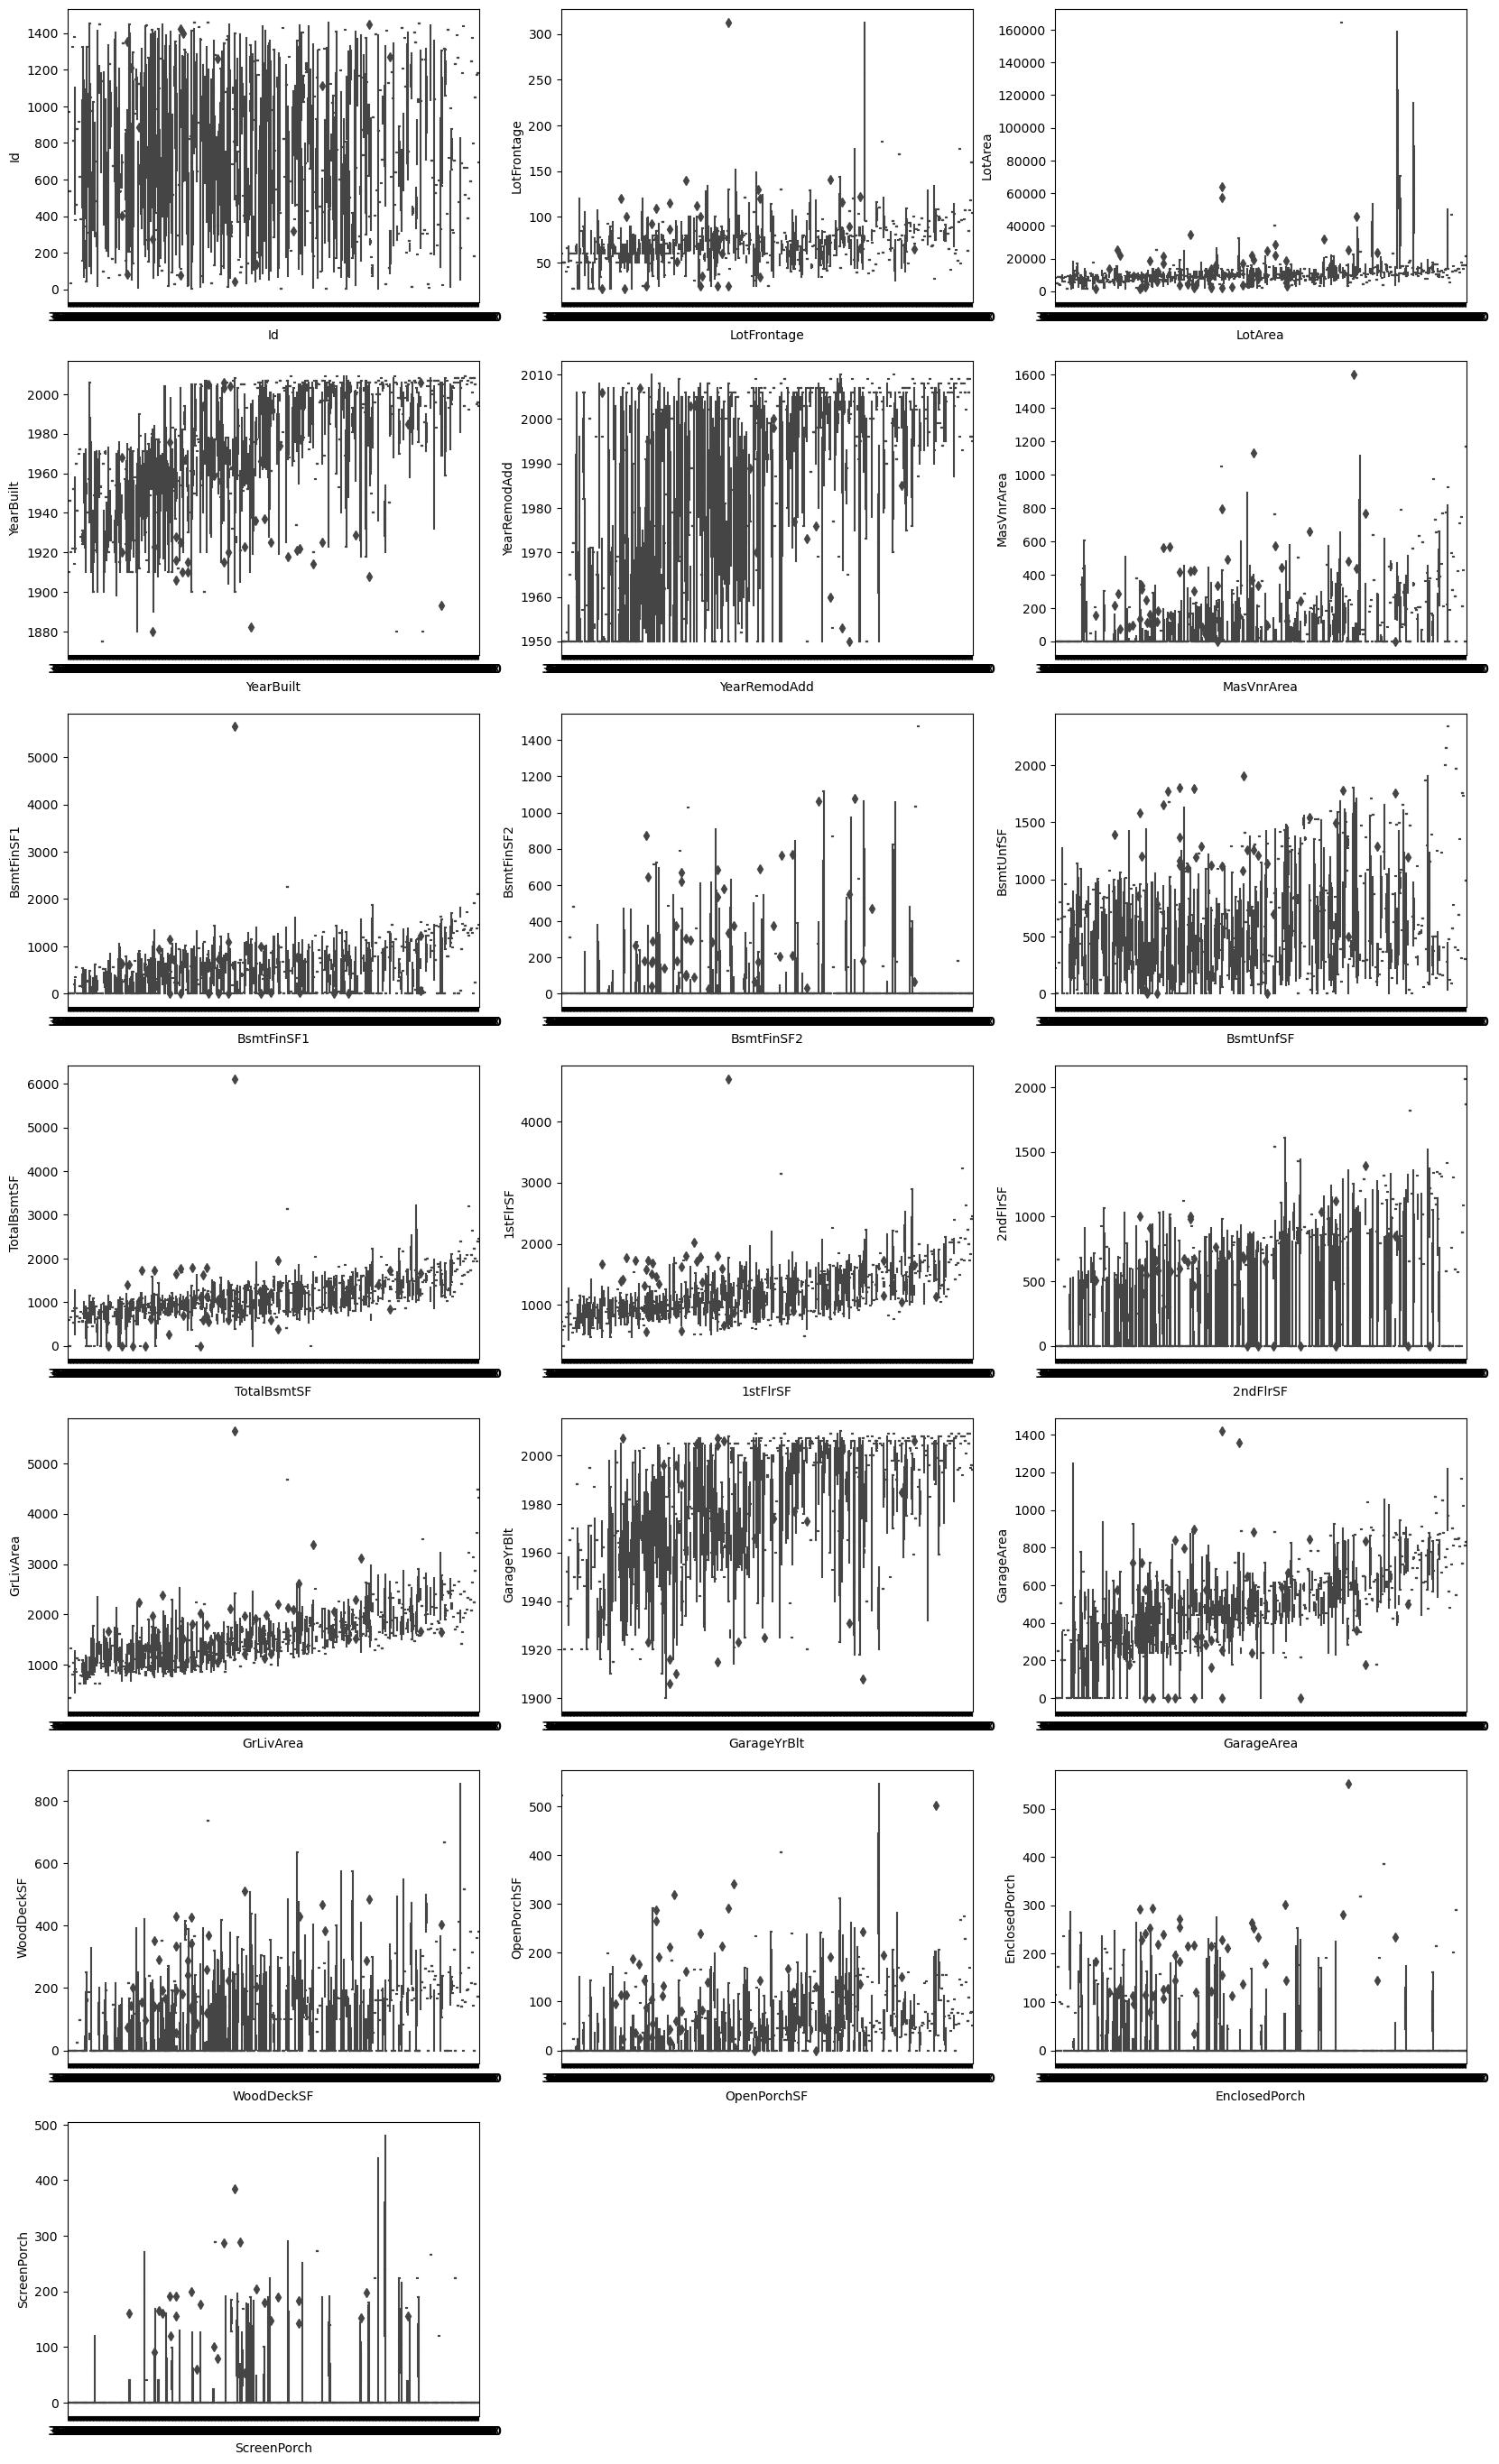

In [23]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for feature in con_features:
    ax=plt.subplot (12,3,plotnumber)
    sns.boxplot(x='SalePrice',y=df[feature],data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()    

ValueError: num must be 1 <= num <= 36, not 37

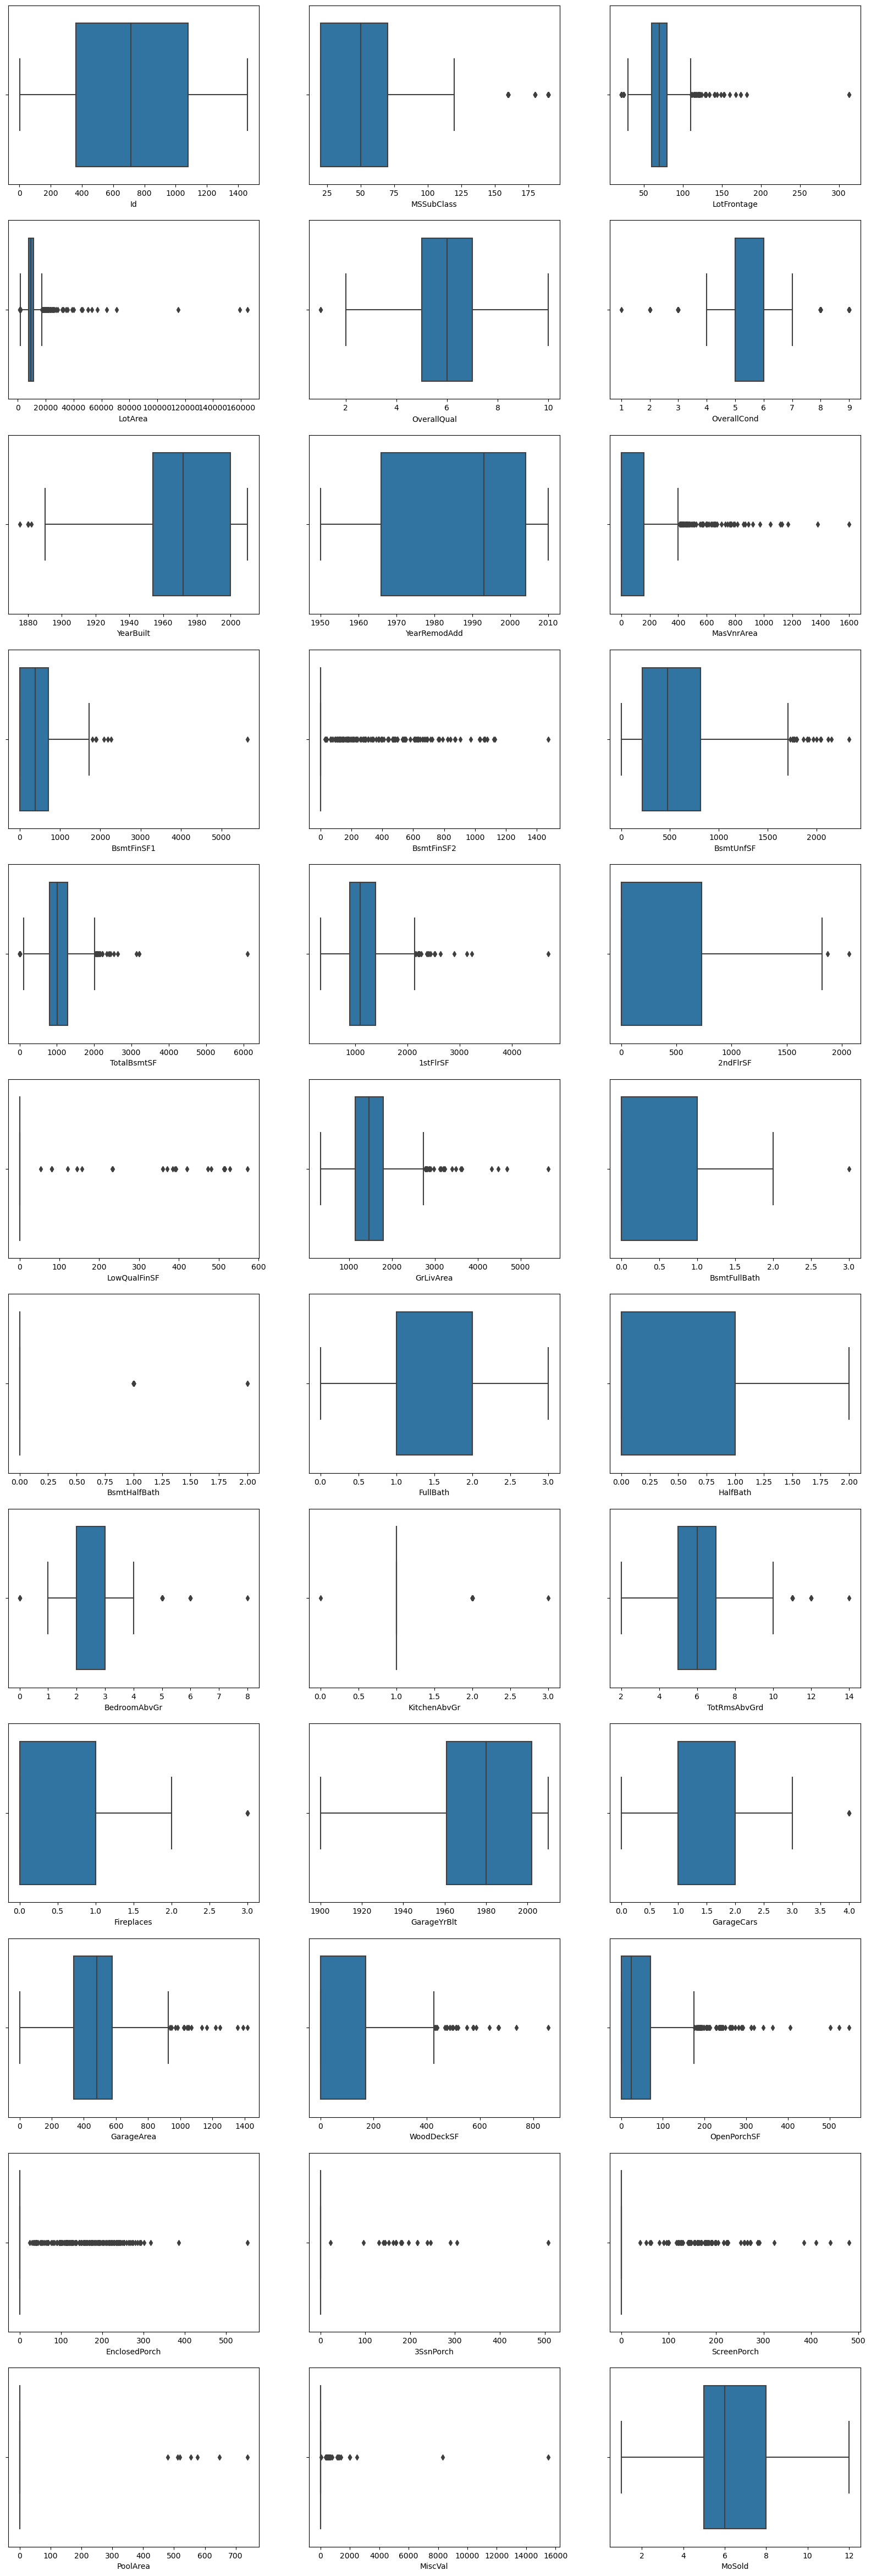

In [24]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for num_feature in num_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(df[num_feature])
    plt.xlabel(num_feature)
    plotnumber+=1
plt.show ()   

<AxesSubplot:>

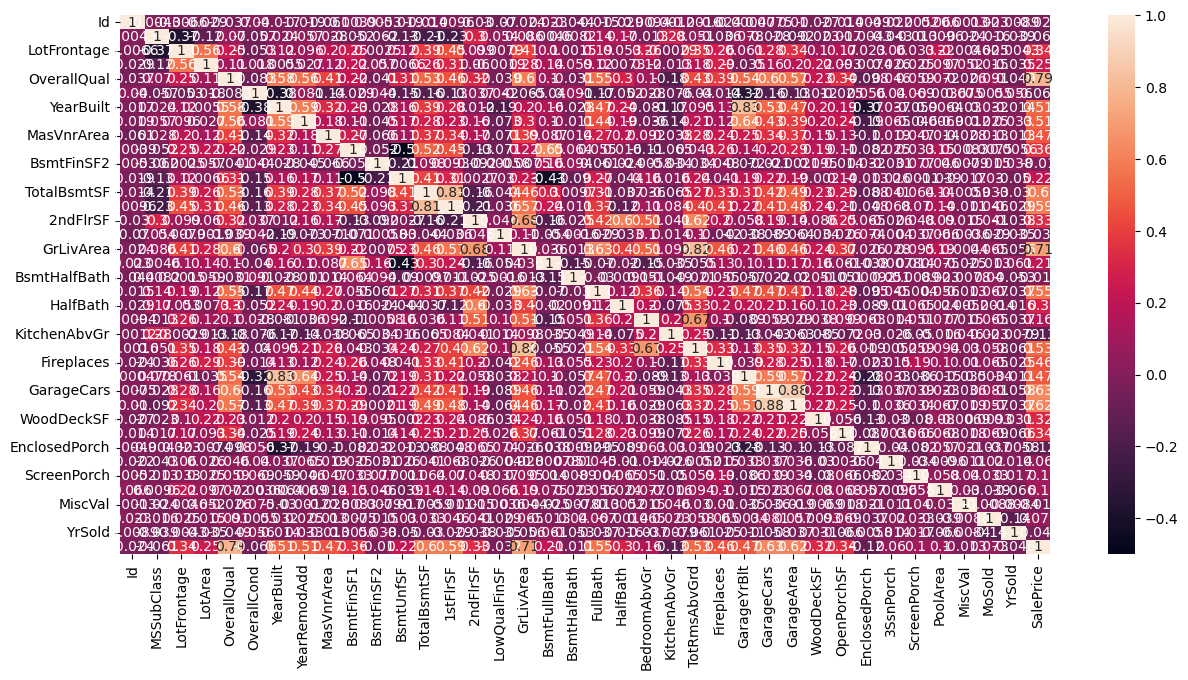

In [25]:
cor_mat=df.corr()
fig=plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

checking the data is balance or not

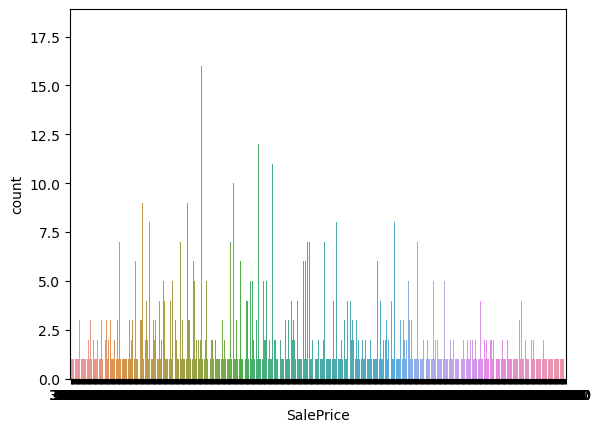

In [26]:
sns.countplot(x='SalePrice',data=df)
plt.show()

In [27]:
df['SalePrice'].groupby(df['SalePrice']).count()

SalePrice
34900     1
35311     1
37900     1
39300     1
40000     1
         ..
582933    1
611657    1
625000    1
745000    1
755000    1
Name: SalePrice, Length: 581, dtype: int64

df2=df.copy()
df2.head()

In [29]:
df2.shape

(1168, 81)

In [30]:
df3=pd.read_csv(r'D:\test.csv')
df3

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [38]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
x=df3.drop['']

In [39]:
y = df2['SalePrice']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

NameError: name 'X' is not defined

In [37]:
len(x_train)

NameError: name 'x_train' is not defined